In [1]:
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

In [2]:
Stock_Market_Data=pd.read_csv('Stock_Market_Data.csv')
Stock_Market_Data

,Date,Name,Open,High,Low,Close,Volume
0,02-01-2022,01.Bank,22.83,23.20,22.59,22.93,1842350.41
1,03-01-2022,01.Bank,23.03,23.29,22.74,22.90,1664989.63
2,04-01-2022,01.Bank,22.85,23.13,22.64,22.84,1354510.97
3,05-01-2022,01.Bank,22.91,23.20,22.70,22.98,1564334.81
4,06-01-2022,01.Bank,23.12,23.65,23.00,23.37,2586344.19
...,...,...,...,...,...,...,...
49153,26-06-2022,ZEALBANGLA,169.00,174.90,169.00,170.30,10480.00
49154,27-06-2022,ZEALBANGLA,174.10,176.00,166.90,167.50,13817.00
49155,28-06-2022,ZEALBANGLA,170.00,170.90,167.00,168.10,5214.00
49156,29-06-2022,ZEALBANGLA,167.10,169.00,164.90,165.10,6678.00


In [3]:
Stock_Market_Data['Date']=pd.to_datetime(Stock_Market_Data['Date'],dayfirst=True)

## Data Cleaning and Exploration:

#####  basic statistics  summary for each column

In [4]:
explore=Stock_Market_Data.describe().round(2)
explore

,Open,High,Low,Close,Volume
count,49158.00,49158.00,49158.00,49158.00,49158.00
mean,157.87,159.59,155.91,157.35,561999.93
std,520.19,523.35,517.14,519.71,1276908.70
min,3.90,3.90,3.00,3.80,1.00
25%,19.00,19.30,18.70,19.00,51094.75
50%,40.30,41.00,39.53,40.10,182416.00
75%,89.40,90.50,87.70,88.70,540139.75
max,6000.00,6050.00,5975.00,6000.50,65931798.00


##### Top 5 Companies Based on 'Volume'

In [5]:
top_5_companies = Stock_Market_Data.groupby('Name')['Volume'].sum().nlargest(5).index.tolist()
top_5_companies

['UNIONBANK', 'KEYACOSMET', 'BEXIMCO', 'FUWANGFOOD', 'IFIC']

In [6]:
Top_5_Company_Data = Stock_Market_Data[Stock_Market_Data['Name'].isin(top_5_companies)]
Top_5_Company_Data

,Date,Name,Open,High,Low,Close,Volume
1828,2022-01-02,BEXIMCO,150.3,154.5,149.5,154.1,6482374.0
1829,2022-01-03,BEXIMCO,155.4,159.9,154.6,156.9,11519937.0
1830,2022-01-04,BEXIMCO,157.4,157.4,151.6,152.6,6918142.0
1831,2022-01-05,BEXIMCO,153.5,154.0,149.5,150.0,6632703.0
1832,2022-01-06,BEXIMCO,151.1,152.0,149.0,149.9,7455503.0
...,...,...,...,...,...,...,...
48735,2022-06-26,UNIONBANK,10.3,10.4,10.2,10.2,1707584.0
48736,2022-06-27,UNIONBANK,10.3,10.3,10.1,10.3,2989712.0
48737,2022-06-28,UNIONBANK,10.3,10.4,10.2,10.2,1536415.0
48738,2022-06-29,UNIONBANK,10.3,10.5,10.2,10.3,2555675.0


##### Distribution of the 'Close' prices over time for top 5 company.

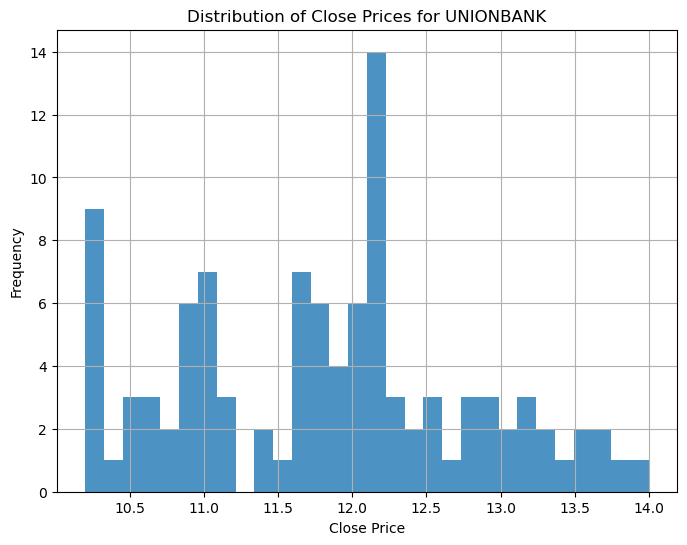

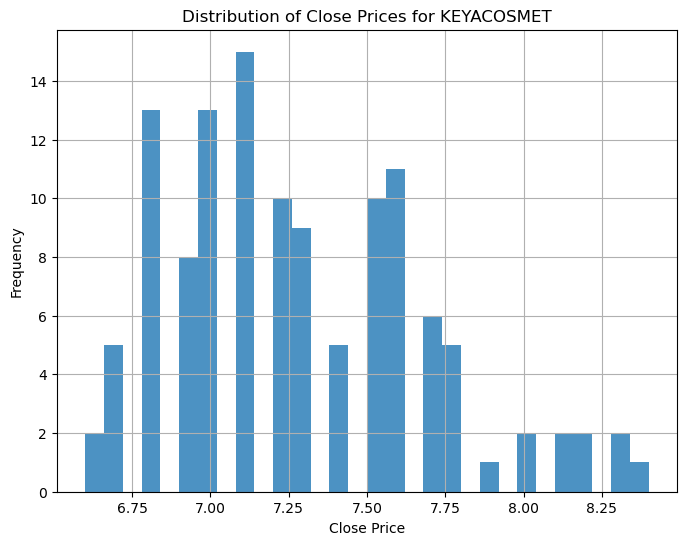

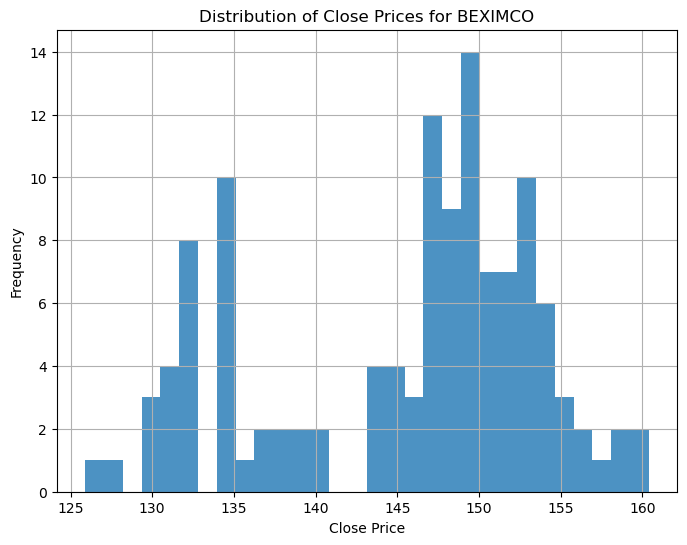

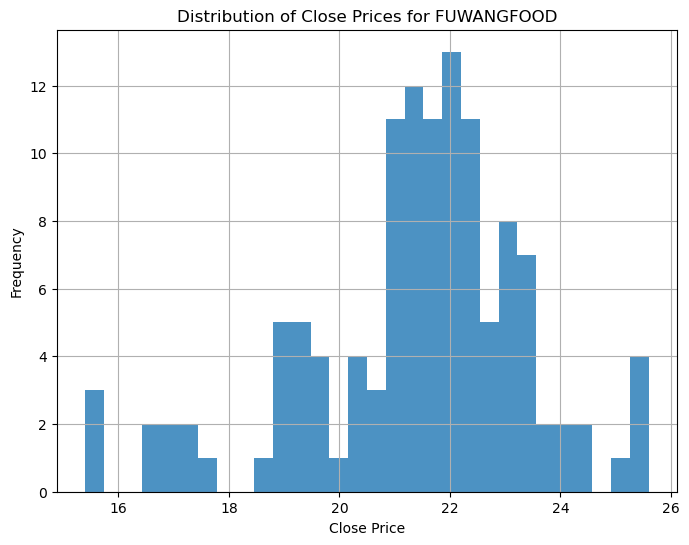

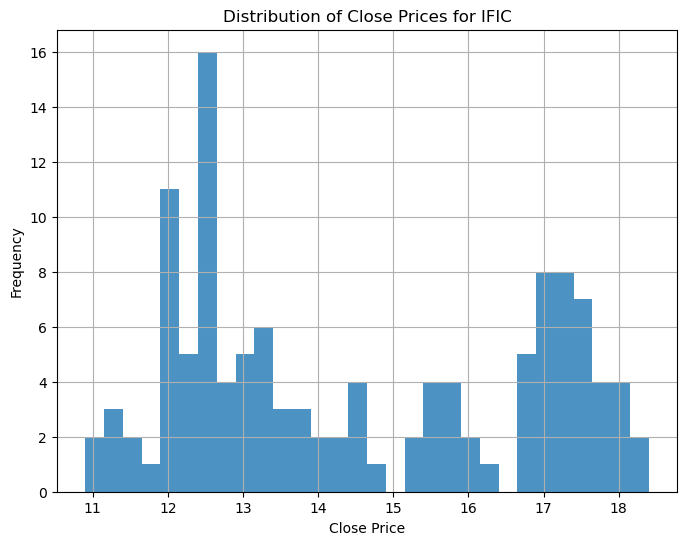

In [7]:
for company in top_5_companies:
    plt.figure(figsize=(8, 6))
    company_data = Stock_Market_Data[Stock_Market_Data['Name'] == company]
    plt.hist(company_data['Close'], bins=30, alpha=.8)
    plt.title(f'Distribution of Close Prices for {company}')
    plt.xlabel('Close Price')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

##### Identifying and analyzing any outliers

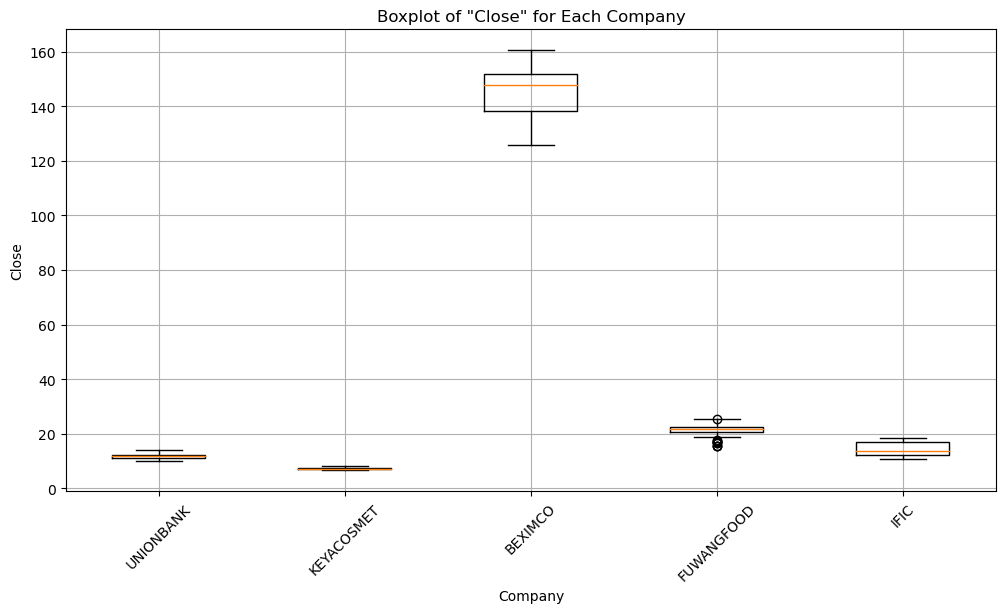

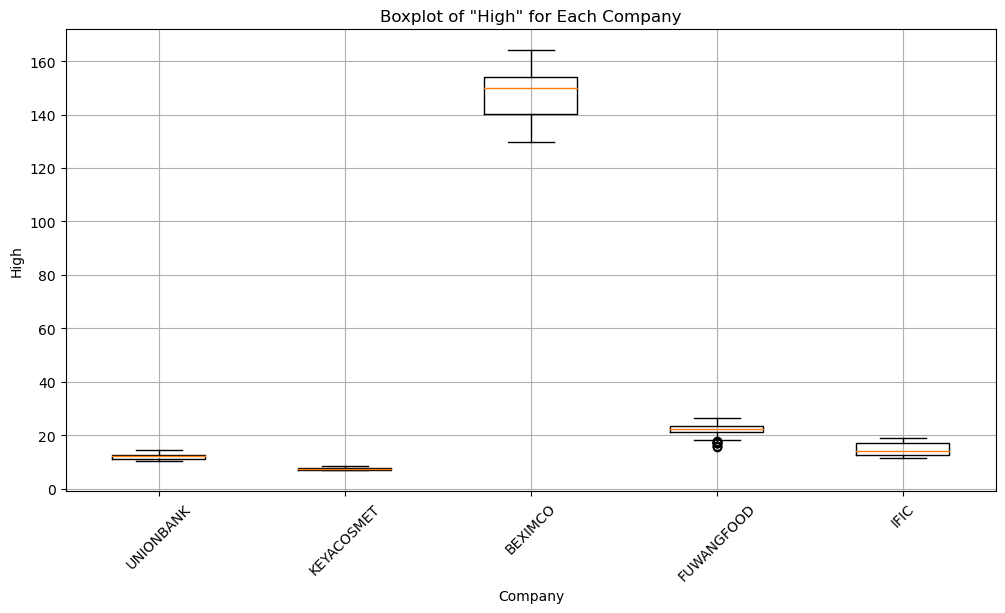

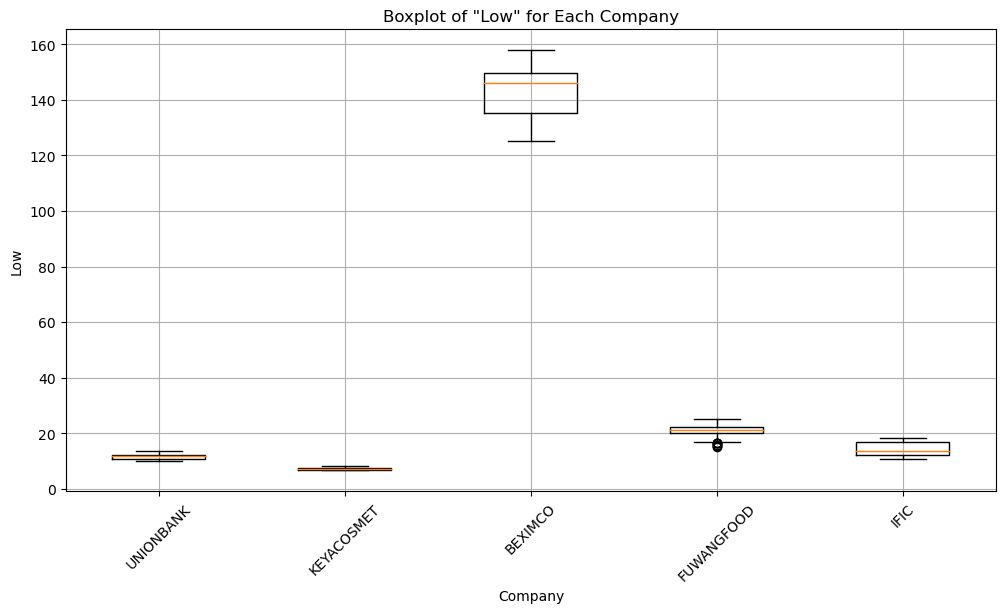

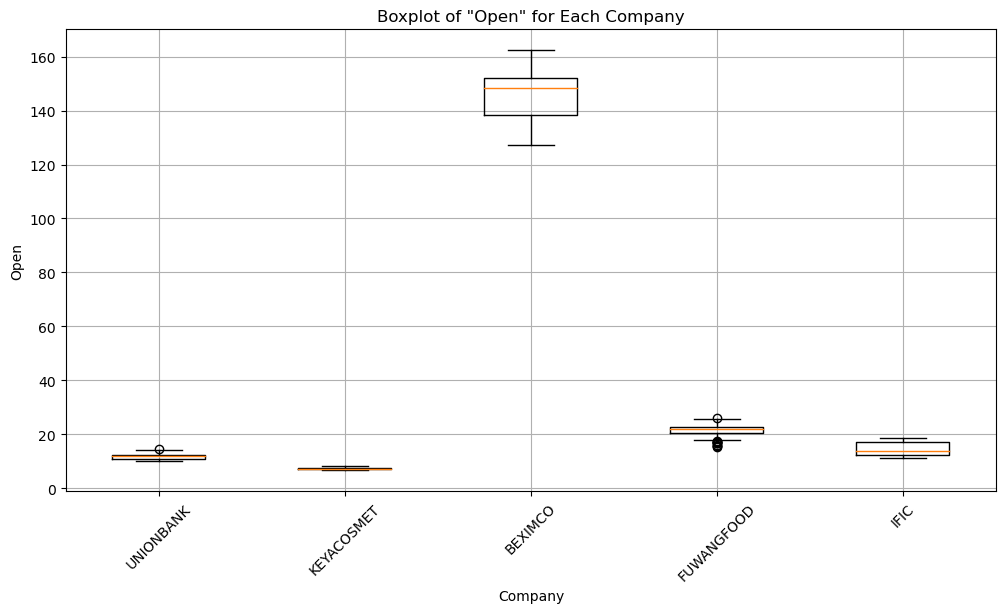

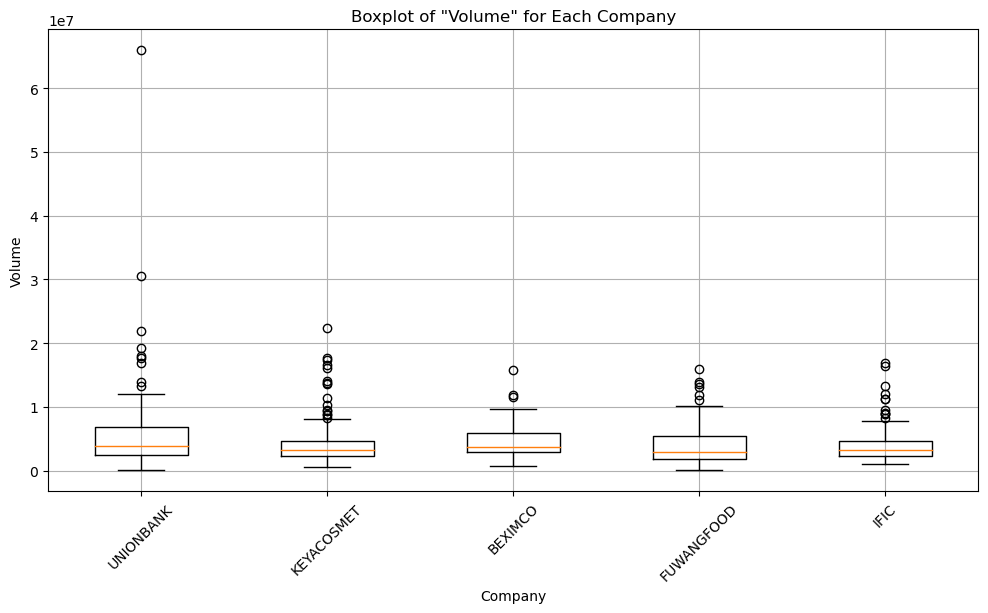

In [8]:
for column in Top_5_Company_Data.columns.difference(['Date', 'Name']):
    plt.figure(figsize=(12, 6))
    plt.title(f'Boxplot of "{column}" for Each Company')
    plt.xlabel('Company')
    plt.ylabel(column)
    plt.boxplot([Stock_Market_Data[Stock_Market_Data['Name'] == name][column] for name in top_5_companies], labels=top_5_companies)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

## Time Series Analysis / Rolling Window / Moving Averages :

##### line chart to visualize the 'Close' prices over time.

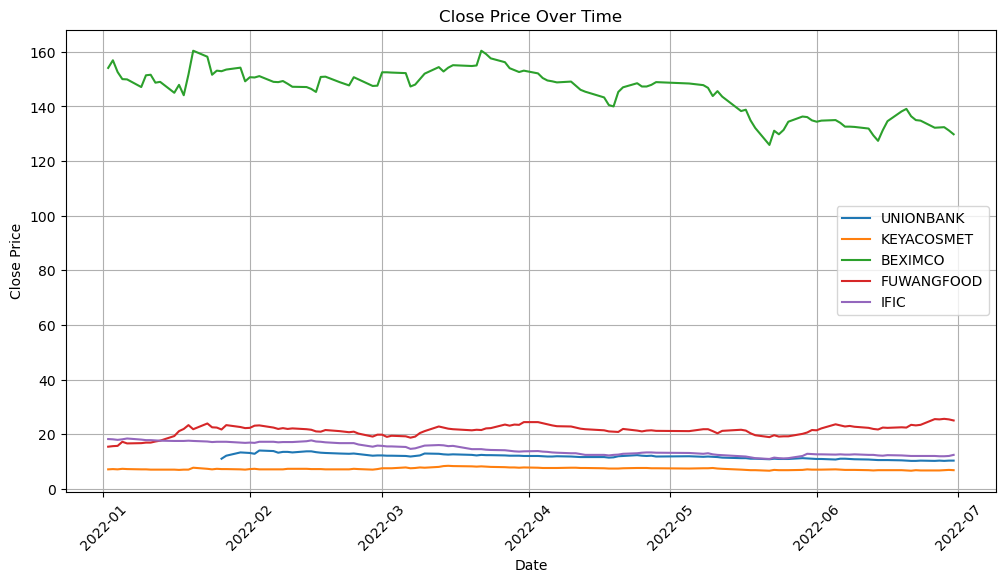

In [9]:
plt.figure(figsize=(12,6))
for company in top_5_companies:
    Data = Stock_Market_Data[Stock_Market_Data['Name']==company]
    plt.plot(Data['Date'],Data['Close'],label=company)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()

##### 2.Calculating and ploting the daily percentage change in closing prices.

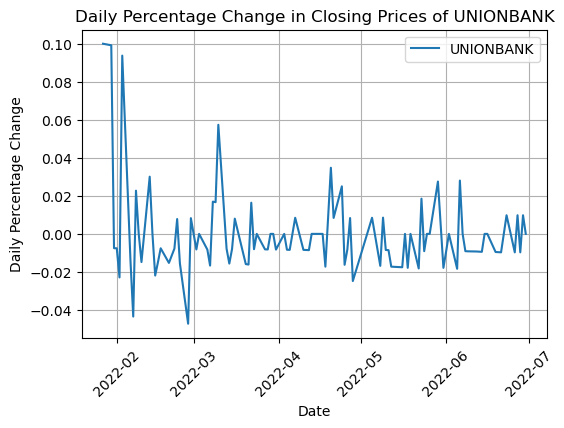

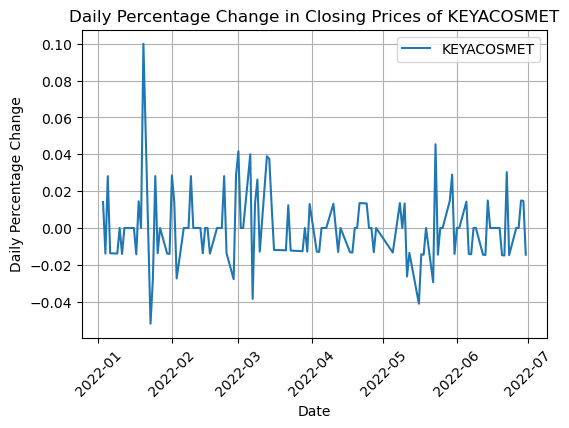

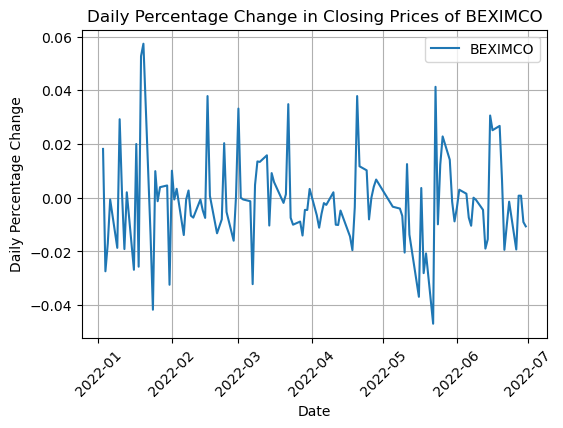

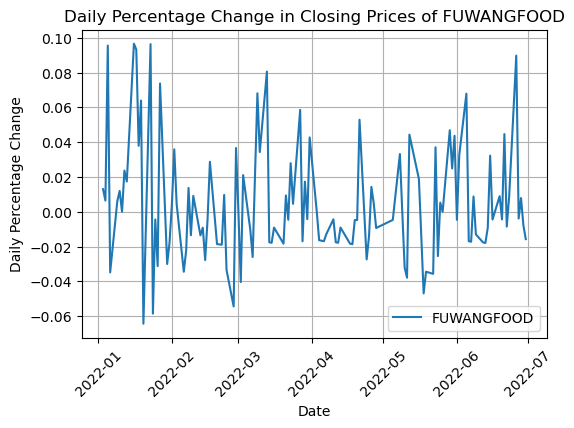

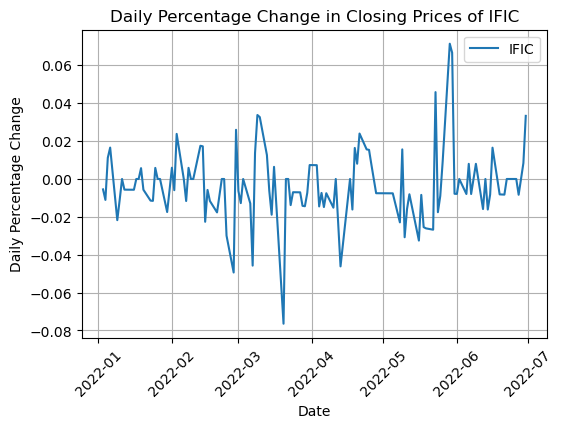

In [10]:
for company in top_5_companies:
    plt.figure(figsize=(6, 4))
    company_data = Stock_Market_Data[Stock_Market_Data['Name'] == company].copy()
    company_data['Daily_PCT_Change'] = company_data['Close'].pct_change()
    plt.plot(company_data['Date'], company_data['Daily_PCT_Change'], label=company)
    plt.xlabel('Date')
    plt.ylabel('Daily Percentage Change')
    plt.title(f'Daily Percentage Change in Closing Prices of {company}')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

##### Investigating the presence of any trends or seasonality in the stock prices.

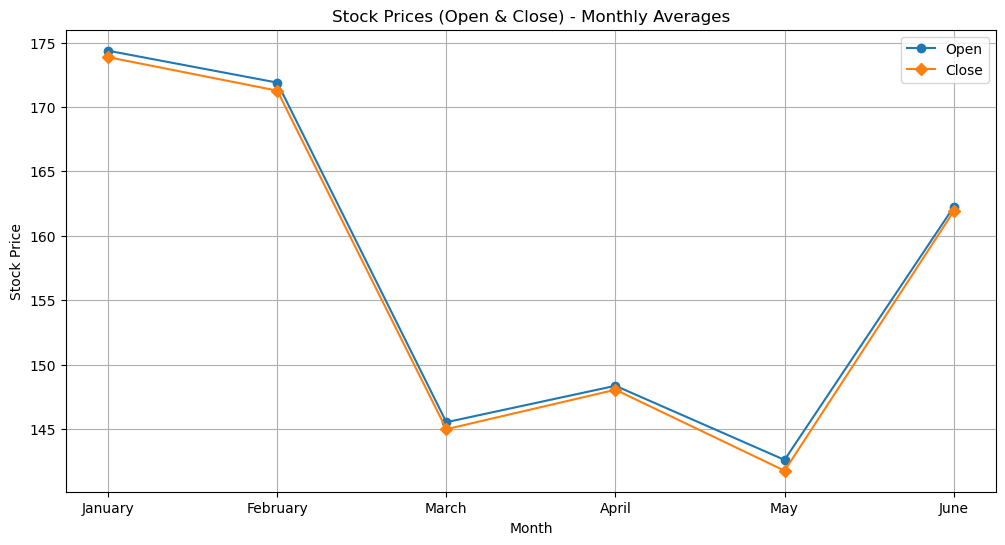

In [11]:
Monthly_data = Stock_Market_Data.resample("M", on="Date")[["Open", "Close"]].mean()
plt.figure(figsize=(12, 6))
plt.plot(Monthly_data.index.month_name(), Monthly_data["Open"], marker="o", label="Open")
plt.plot(Monthly_data.index.month_name(), Monthly_data["Close"], marker="D", label="Close")
plt.xlabel("Month")
plt.ylabel("Stock Price")
plt.title("Stock Prices (Open & Close) - Monthly Averages")
plt.legend()
plt.grid()
plt.show()


##### Applying moving averages to smooth the time series data in 15,30 day intervals against the original graph.

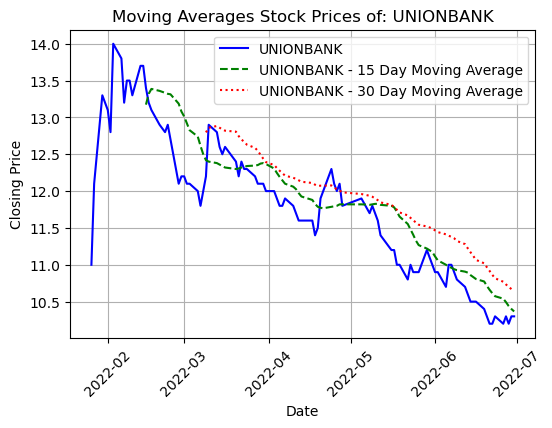

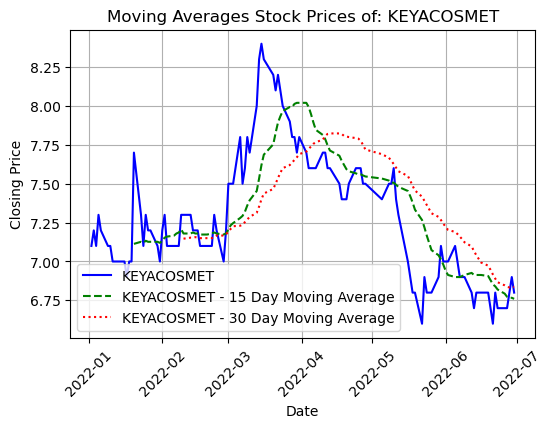

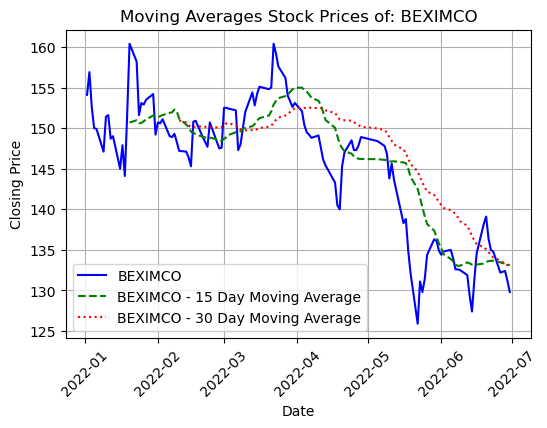

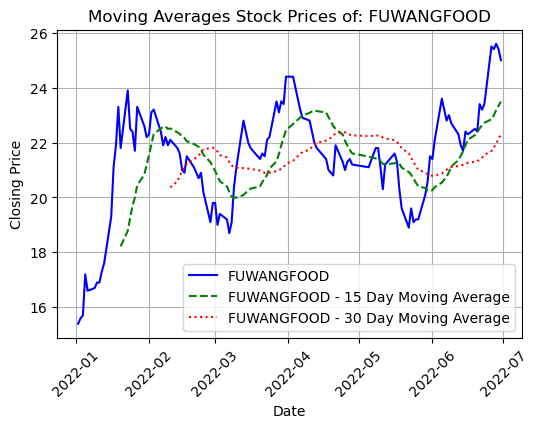

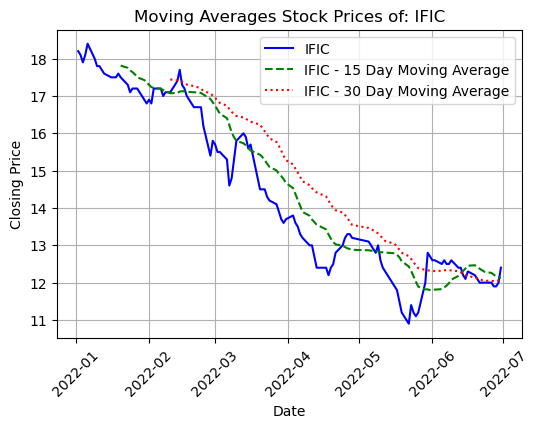

In [12]:
for company in top_5_companies:
    plt.figure(figsize=(6,4))
    company_data = Stock_Market_Data[Stock_Market_Data['Name'] == company].copy()
    plt.plot(company_data['Date'], company_data['Close'], label=company, color='blue')
    
    company_data['15_Day_Moving_Average'] = company_data['Close'].rolling(window=15).mean()
    company_data['30_Day_Moving_Average'] = company_data['Close'].rolling(window=30).mean()
    plt.plot(company_data['Date'], company_data['15_Day_Moving_Average'], label=f'{company} - 15 Day Moving Average', linestyle='--', color='green')
    plt.plot(company_data['Date'], company_data['30_Day_Moving_Average'], label=f'{company} - 30 Day Moving Average', linestyle=':', color='red')

    plt.title(f'Moving Averages Stock Prices of: {company}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

##### Calculating the average closing price for each stock.

In [13]:
Average_Closing_Price = Stock_Market_Data.groupby('Name')['Close'].mean()
Average_Closing_Price

Name
01.Bank                       21.260902
02.Cement                     96.600820
03.Ceramics_Sector            71.225164
04.Engineering               132.352459
05.Financial_Institutions     29.253525
                                ...    
WMSHIPYARD                    12.370492
YPL                           21.339344
ZAHEENSPIN                     9.964754
ZAHINTEX                       7.858197
ZEALBANGLA                   150.338525
Name: Close, Length: 412, dtype: float64

##### Identifying the top 5 and bottom 5 stocks based on average closing price

In [14]:
top_5_stocks = Average_Closing_Price.sort_values(ascending=False).head(5)
bottom_5_stocks = Average_Closing_Price.sort_values(ascending=True).head(5)
print("\nTop 5 Stocks based on Average Closing Price: \n", top_5_stocks)
print("\nBottom 5 Stocks based on Average Closing Price:\n", bottom_5_stocks)


Top 5 Stocks based on Average Closing Price: 
 Name
APSCLBOND     5413.238636
RECKITTBEN    5342.024793
PREBPBOND     4918.357143
IBBL2PBOND    4851.330357
PBLPBOND      4836.195652
Name: Close, dtype: float64

Bottom 5 Stocks based on Average Closing Price:
 Name
FAMILYTEX     4.698361
ICBIBANK      4.725620
FBFIF         5.289344
POPULAR1MF    5.368033
PHPMF1        5.417213
Name: Close, dtype: float64


## Volatility Analysis:

##### Calculating and ploting the rolling standard deviation of the 'Close' prices.

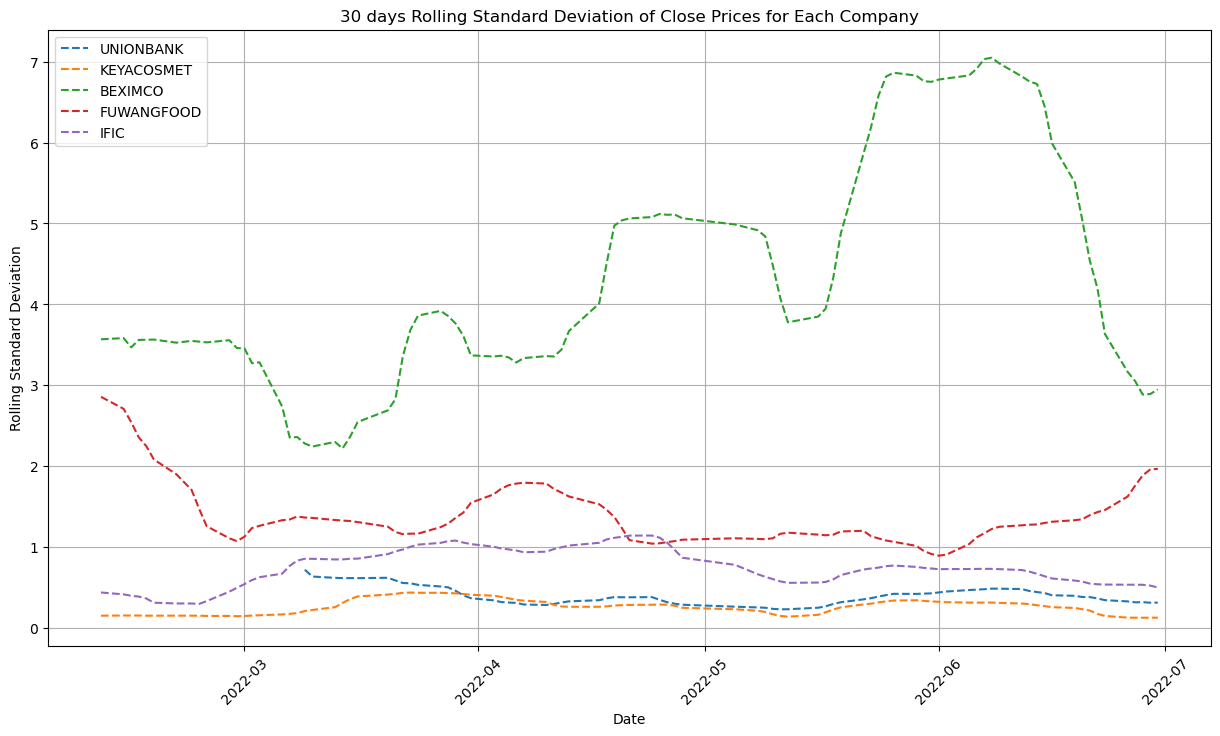

In [15]:
plt.figure(figsize=(15, 8))
for company in top_5_companies:
    company_data = Stock_Market_Data[Stock_Market_Data['Name'] == company]
    rolling_std = company_data['Close'].rolling(window=30).std()
    plt.plot(company_data['Date'],rolling_std,linestyle='--', label=company)
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.title('30 days Rolling Standard Deviation of Close Prices for Each Company')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

##### Creating a new column for daily price change (Close - Open).

In [16]:
Stock_Market_Data['Daily_Price_Change'] = Stock_Market_Data['Close']-Stock_Market_Data['Open']
Stock_Market_Data

,Date,Name,Open,High,Low,Close,Volume,Daily_Price_Change
0,2022-01-02,01.Bank,22.83,23.20,22.59,22.93,1842350.41,0.10
1,2022-01-03,01.Bank,23.03,23.29,22.74,22.90,1664989.63,-0.13
2,2022-01-04,01.Bank,22.85,23.13,22.64,22.84,1354510.97,-0.01
3,2022-01-05,01.Bank,22.91,23.20,22.70,22.98,1564334.81,0.07
4,2022-01-06,01.Bank,23.12,23.65,23.00,23.37,2586344.19,0.25
...,...,...,...,...,...,...,...,...
49153,2022-06-26,ZEALBANGLA,169.00,174.90,169.00,170.30,10480.00,1.30
49154,2022-06-27,ZEALBANGLA,174.10,176.00,166.90,167.50,13817.00,-6.60
49155,2022-06-28,ZEALBANGLA,170.00,170.90,167.00,168.10,5214.00,-1.90
49156,2022-06-29,ZEALBANGLA,167.10,169.00,164.90,165.10,6678.00,-2.00


##### Analyzing the distribution of daily price changes.

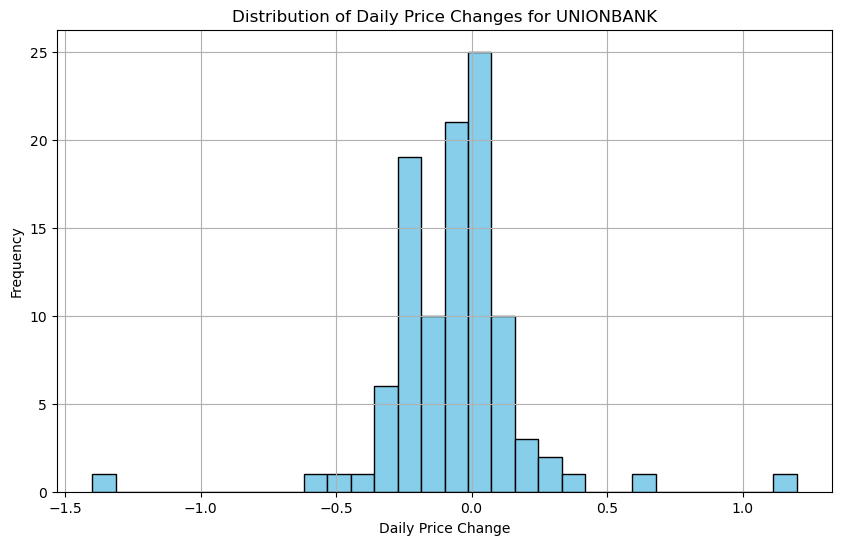

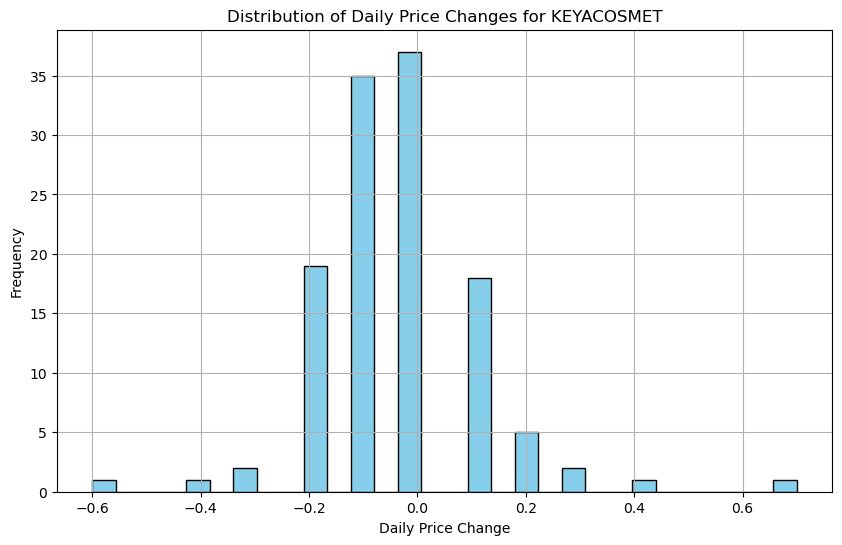

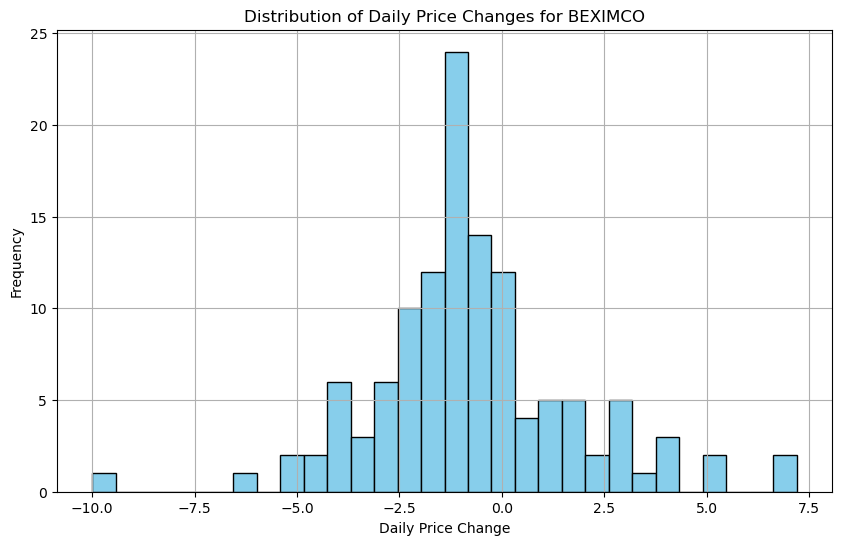

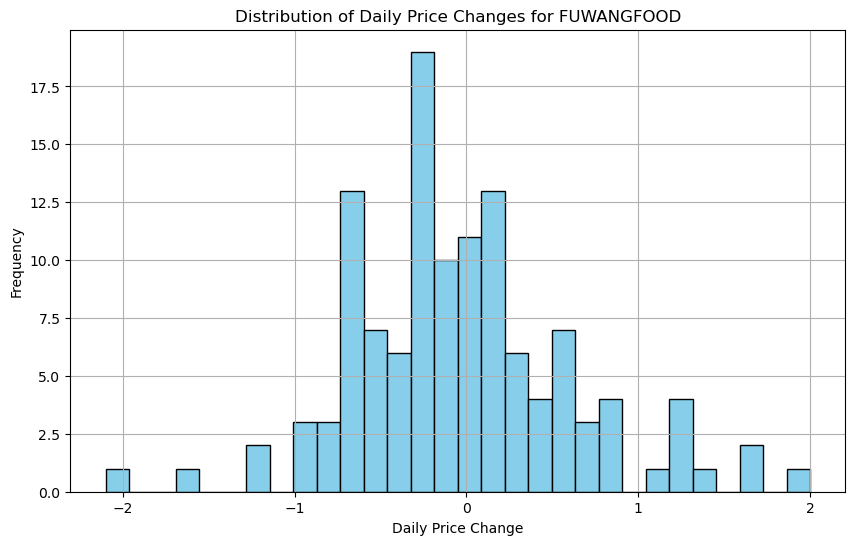

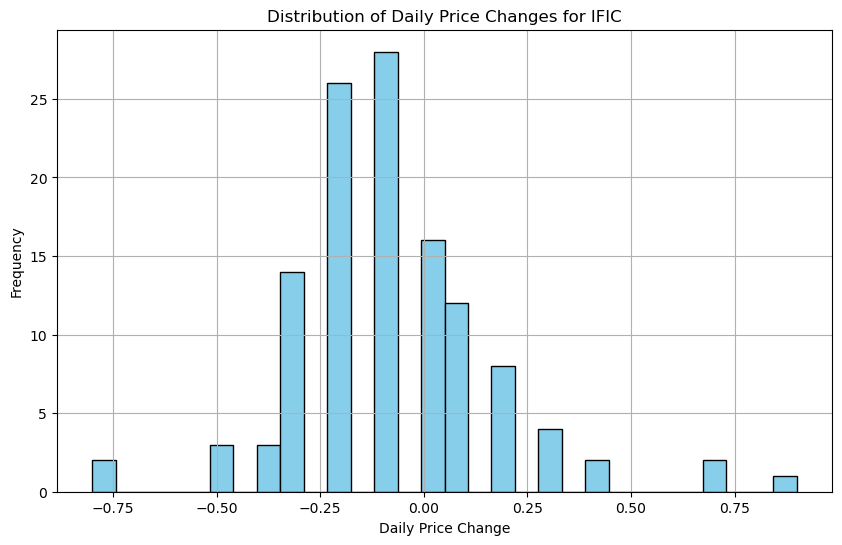

In [17]:
for company in top_5_companies:
    company_data = Stock_Market_Data[Stock_Market_Data['Name']==company]
    plt.figure(figsize=(10, 6))
    plt.hist(company_data['Daily_Price_Change'], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Daily Price Changes for {company}')
    plt.xlabel('Daily Price Change')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

##### Identifying days with the largest price increases and decreases.

In [18]:
largest_increase = Stock_Market_Data.nlargest(1, 'Daily_Price_Change')
print("Days with the largest price increases:")
print(largest_increase[['Date','Name', 'Daily_Price_Change']])

largest_decrease = Stock_Market_Data.nsmallest(1, 'Daily_Price_Change')
print("\nDays with the largest price decreases:")
print(largest_decrease[['Date','Name', 'Daily_Price_Change']])

Days with the largest price increases:
            Date        Name  Daily_Price_Change
48081 2022-06-29  SJIBLPBOND               187.0

Days with the largest price decreases:
            Date        Name  Daily_Price_Change
23365 2022-03-07  RECKITTBEN              -189.2


##### Identifying stocks with unusually high trading volume on certain days.

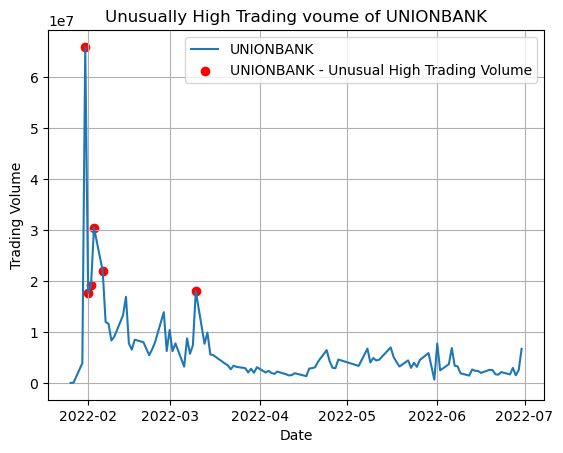

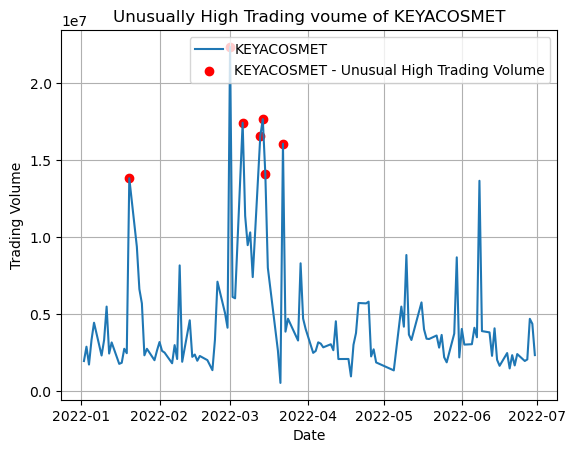

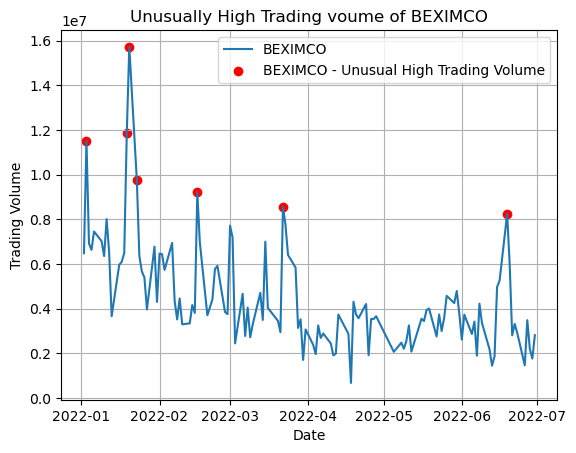

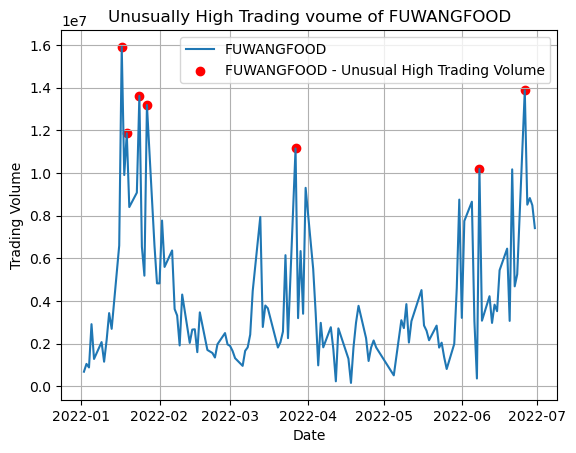

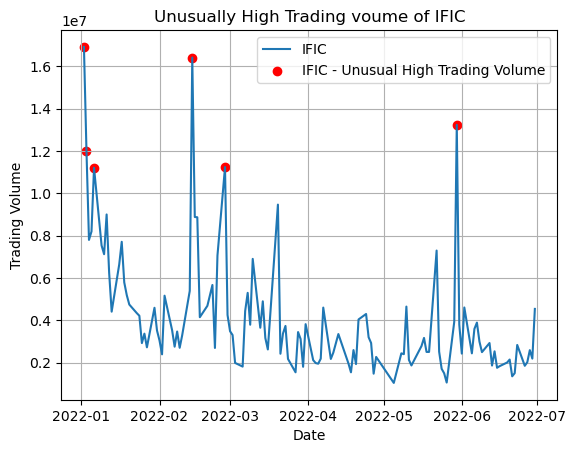

In [19]:
for company in top_5_companies:
    company_data = Stock_Market_Data[Stock_Market_Data['Name'] == company]
    plt.plot(company_data['Date'],company_data['Volume'],label = company)

    threshold = company_data['Volume'].quantile(0.95)
    unusual_data = company_data[company_data['Volume'] > threshold]
    plt.scatter(unusual_data['Date'], unusual_data['Volume'], color="red", marker='o', label=f'{company} - Unusual High Trading Volume')

    plt.title(f'Unusually High Trading voume of {company}')
    plt.xlabel('Date')
    plt.ylabel('Trading Volume')
    plt.legend()
    plt.grid()
    plt.show()

## Correlation and Heatmaps:

##### Exploring the relationship between trading volume and volatility

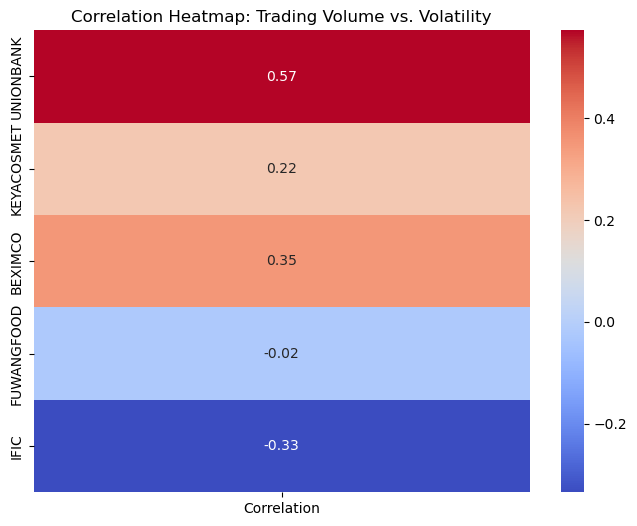

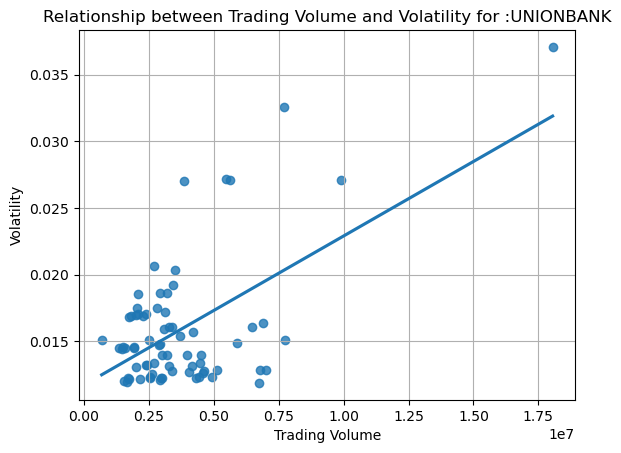

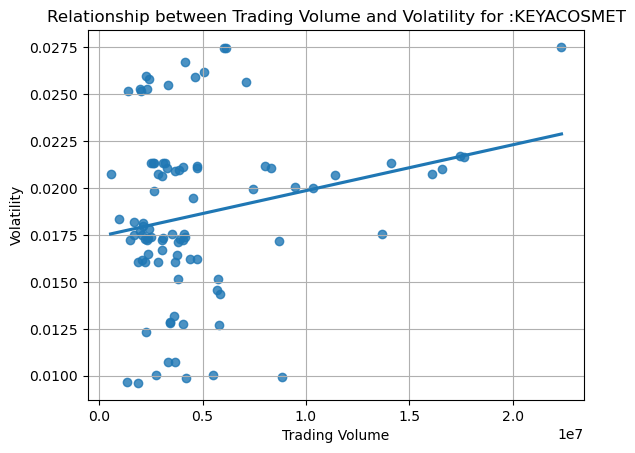

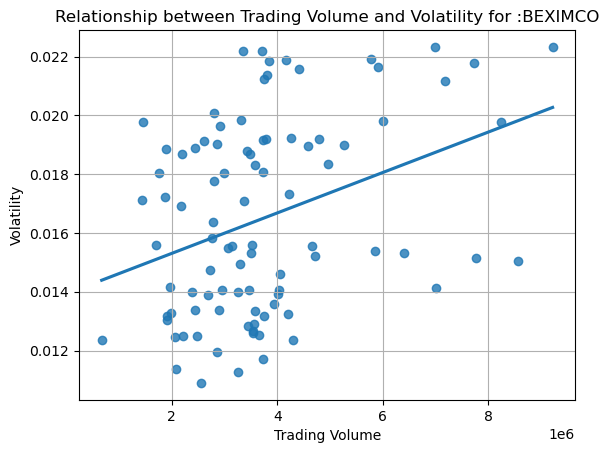

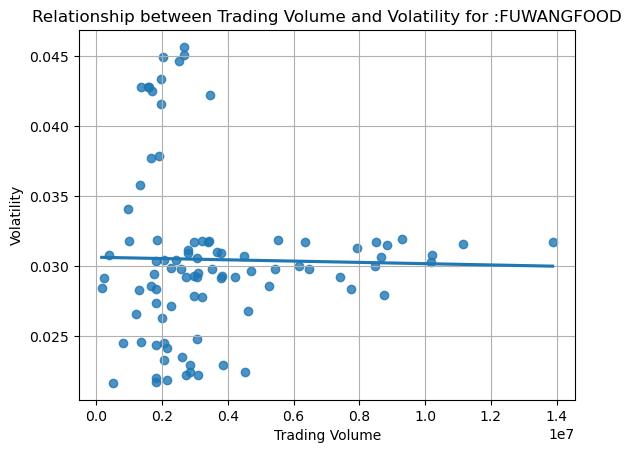

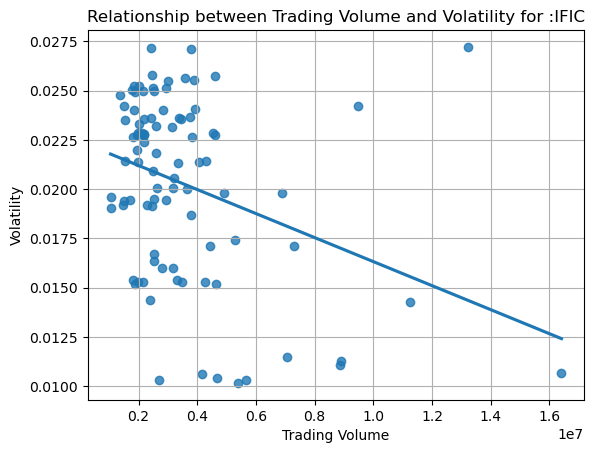

In [20]:
correlation_df = pd.DataFrame(index=top_5_companies, columns=['Correlation'])
correlation_df['Correlation'] = pd.to_numeric(correlation_df['Correlation'])

for company in top_5_companies:
    company_data = Stock_Market_Data[Stock_Market_Data['Name'] == company].copy()  # Make a copy to avoid SettingWithCopyWarning
    company_data['Volatility'] = company_data['Close'].pct_change().rolling(window=30).std()
    correlation = company_data[['Volume', 'Volatility']].corr().iloc[0, 1]
    correlation_df.loc[company, 'Correlation'] = correlation
    
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Trading Volume vs. Volatility')
plt.show()

for company in top_5_companies:
    company_data = Stock_Market_Data[Stock_Market_Data['Name'] == company].copy()
    company_data['Volatility'] = company_data['Close'].pct_change().rolling(window=30).std()
    sns.regplot(x=company_data['Volume'], y=company_data['Volatility'],ci= None)
    plt.title(f'Relationship between Trading Volume and Volatility for :{company}')
    plt.xlabel('Trading Volume')
    plt.ylabel('Volatility')
    plt.grid()
    plt.show()

##### Calculating the correlation matrix between the 'Open' & 'High', 'Low' &'Close' prices.

In [21]:
for company in top_5_companies:
    company_data = Stock_Market_Data[Stock_Market_Data['Name']==company].copy()
    correlation_matrix = company_data[['Open', 'High', 'Low', 'Close']].corr()
    print(f' correlation_matrix of \033[1m{company}\033[0m')
    print(f'\n{correlation_matrix}\n')

 correlation_matrix of UNIONBANK

           Open      High       Low     Close
Open   1.000000  0.984464  0.983739  0.969240
High   0.984464  1.000000  0.978242  0.988152
Low    0.983739  0.978242  1.000000  0.984388
Close  0.969240  0.988152  0.984388  1.000000

 correlation_matrix of KEYACOSMET

           Open      High       Low     Close
Open   1.000000  0.945815  0.965903  0.927996
High   0.945815  1.000000  0.949416  0.973697
Low    0.965903  0.949416  1.000000  0.966941
Close  0.927996  0.973697  0.966941  1.000000

 correlation_matrix of BEXIMCO

           Open      High       Low     Close
Open   1.000000  0.977330  0.977721  0.955140
High   0.977330  1.000000  0.974154  0.981667
Low    0.977721  0.974154  1.000000  0.983281
Close  0.955140  0.981667  0.983281  1.000000

 correlation_matrix of FUWANGFOOD

           Open      High       Low     Close
Open   1.000000  0.973726  0.981517  0.951527
High   0.973726  1.000000  0.971483  0.983469
Low    0.981517  0.971483  1.0000

##### Creating  heatmap to visualize the correlations using the seaborn package.

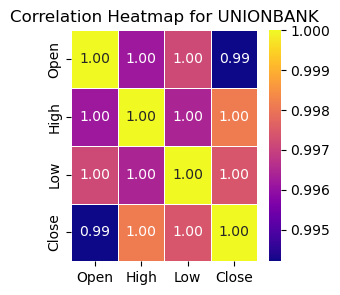

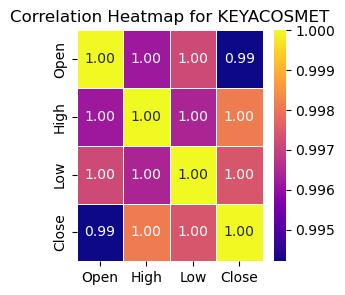

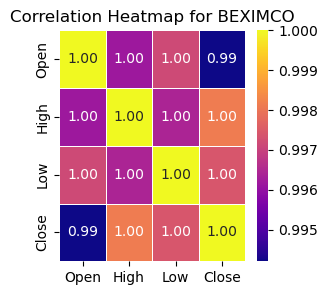

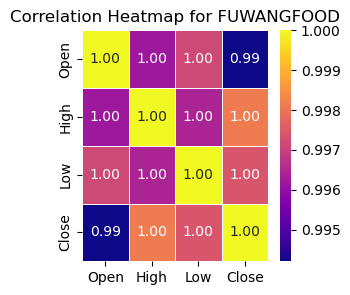

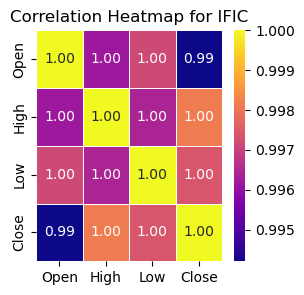

In [22]:
for company in top_5_companies:
    company_data = Stock_Market_Data[Stock_Market_Data['Name']==company].copy()
    plt.figure(figsize=(3,3))
    sns.heatmap(correlation_matrix, annot=True,cmap='plasma',fmt='.2f',linewidths=.5)
    plt.title(f'Correlation Heatmap for {company}')
    plt.show()